# Exercícios: Aprendizagem não supervisionada

In [12]:
import os

import numpy as np
import pandas as pd

import sklearn
import sklearn.metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [13]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Para estes exercícios, será usado o conjunto de dados [Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python):

In [14]:
data_path = '../data/' if os.path.exists('../data/') else 'https://raw.githubusercontent.com/TheAwesomeGe/DECD/main/data/'
csv_file_path = data_path + 'Mall_Customers.csv'
df = pd.read_csv(csv_file_path, index_col='CustomerID')

1. Comece por analisar os dados e compreender os vários atributos.

In [15]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


2. Prepare os dados de forma a obter um conjunto que tenha apenas atributos numéricos. (**Nota**: Pode optar por descartar ou transformar os atributos que não sejam numéricos)

In [16]:
prepare_df = df.drop(columns=['Gender'])
prepare_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


3. Analise a distribuição de cada um dos atributos.

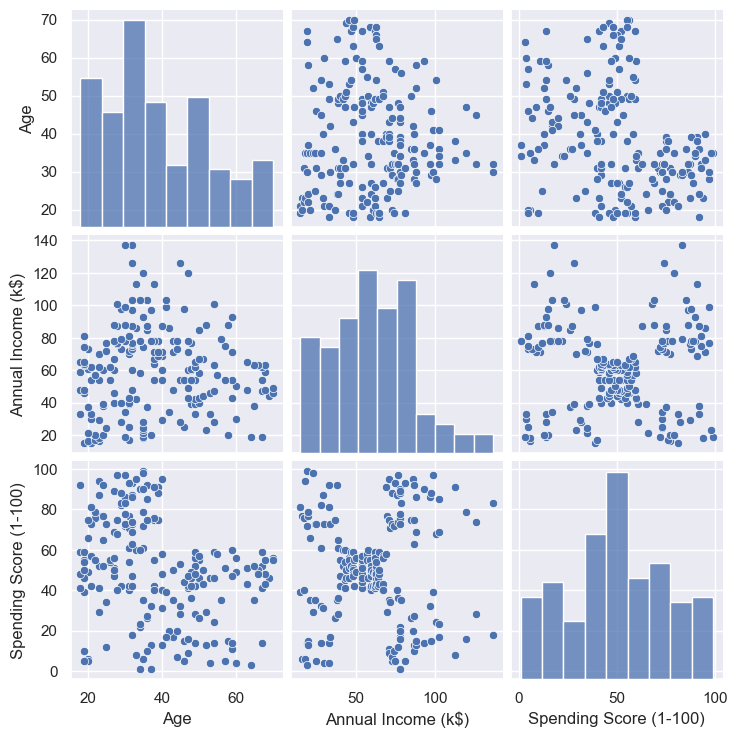

In [17]:
prepare_df.describe()
sns.pairplot(prepare_df)

4. Aplique a abordagem PCA e visualize a projeção dos dados nos dois componentes principais.

5. Verifique qual a percentagem da variância do conjunto de dados explicada pelos dois componentes principais.

6. Utilize o algoritmo *k-Means* para agrupar os dados. Escolha um valor de *k* adequado e visualize o agrupamento obtido.

7. Agrupe os dados usando *clustering* hierárquico aglomerativo e visualize o dendrograma.

8. Selecione o mesmo número de clusters usado para o algoritmo *k-means* e compare os dois agrupamentos.

9. Agrupe os dados usando o algoritmo *DBSCAN*. Explore e visualize os agrupamentos obtidos usando múltiplas parametrizações. Como varia o número de clusters e a percentagem de *outliers*?

10. Qual das três abordagens lhe parece produzir um agrupamento de melhor qualidade?

11. Verifique se normalizar os dados tem impacto no resultado final.

12. Discretize os atributos originais e repita as experiências. (**Sugestão**: Use as funções [`cut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) e [`qcut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) da biblioteca *pandas*)